## 1. Матрица Вандермонда (10 баллов)

Напишите функцию, генерирующую матрицу [Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принимающую на вход вектор $(𝑥_1,...,𝑥_𝑛)$ .
В этом задании запрещается пользоваться готовыми реализациями (например, numpy.vander), а также np.repeat и np.transpose.
При решении задействуйте np.reshape и/или np.newaxis.

In [0]:
import numpy as np

In [0]:
vect = np.random.randint(50, size=5)
vect 

array([25, 15,  3, 45, 24])

In [0]:
def vandermonde(vect):
  notnull = np.where(vect!=0)
  length = len(vect)
  zero = np.zeros((length, length-1))
  vector = vect[notnull[0]]
  step = np.power(vector, (length-1))
  geom = np.geomspace(vector, step, num=(length-1)).swapaxes(0,1)
  zero[notnull[0]]= geom
  vander = np.hstack((np.ones(length).reshape(length,1), zero)).round().astype(int)
  return vander

In [0]:
vandermonde(vect)

array([[      1,      25,     625,   15625,  390625],
       [      1,      15,     225,    3375,   50625],
       [      1,       3,       9,      27,      81],
       [      1,      45,    2025,   91125, 4100625],
       [      1,      24,     576,   13824,  331776]])

## 2. Марафон (30 баллов)

#### История
Как-то раз Винни-Пух, Пятачок, Кролик и Иа-Иа решили пробежать марафон. Они договорились бежать $n$ часов. Побеждает тот, кто пробегает за эти $n$ часов больше всего километров. Каждый участник бежит по-разному, то сколько он пробежит за один час поддается одному из законов распределений. Например, если имеется равномерное распределение $U[1,3]$, то участник может пробежать за первый час 1.3км, за второй 2.4км и так далее.

* Винни-Пух в целом может пробежать достаточно много, но с большой вероятностью останавливается покушать мёда и пробегает мало. Его закон распределения это показательное распределение с $\lambda = 1$.
* Пятачок бежит в одном темпе и старается пробегать приблизительно одинаковую дистанцию. Изредка, он может перепутать направление и немного пробежать не в ту сторону. Его закон распределения это нормальное распределение $N(1, 1)$.
* Кролик - перфекционист. Он бежит целое количество киллометров. Если он понимает, что за оставшееся время он уже не пробежит еще один километр, то он останавливается и ждет следующий час. Его закон распределения это распределение Пуассона с $\lambda = 1$.
* Иа-Иа в течение часа может грустить с вероятностью 0.5 и пробжеать 0 километров или быть очень веселым (с вероятностью 0.5) и пробежать 2 километра. Его закон распределения это распределение Бернулли.

#### Задание №1

Вам нужно: 
* Создать трехмерную матрицу размера $10^4 \times 4 \times n$. Первая ось отвечает за номер марафона, вторая ось за каждого участника, а третья ось за каждый час марафона. Вторую и третью ось можно поменять, если вам так удобнее.
* Выявить победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.
* Запрещено пользоваться циклами. Нужно использовать возможности numpy.

Что можно сказать о результатах?

#### Задание №2
 
Участники решили объединиться в пары: Винни-Пух с Пятачком, Кролик с Иа-Иа. Они решили суммировать свои результаты.

Вам нужно: 
* Сгенерировать новую трехмерную матрицу, но уже объединив участников в команды.
* Выявить команду-победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.

Логичны ли полученные результаты?

###Задание 1

In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [0]:
n=15 #длительность марафона в часах
vin = np.random.exponential(1,size=(10**4,n)).reshape(n*10**4)
pyat = np.random.normal(1,1,size=(10**4,n)).reshape(n*10**4)
krol = np.random.poisson(1,size=(10**4,n)).reshape(n*10**4)
ia = (np.random.binomial(1,0.5, size=(10**4,n))*2).reshape(n*10**4)
mar = np.array([vin,pyat,krol,ia])
mar = np.reshape(mar, (10**4*4,n))
mar = np.reshape(mar, (10**4,4,n), order='F')
mar.shape

(10000, 4, 15)

In [0]:
#Выявим победителя в каждом марафоне
pobed = np.reshape(mar,(40000,n))
pobed = np.sum(pobed, axis=1)
pobed = np.reshape(pobed,(10000,4))
pobed = pobed.argmax(axis=1)
print('Количество побед Винни-Пуха',np.sum(pobed==0))
print('Количество побед Пятачка',np.sum(pobed==1))
print('Количество побед Кролика',np.sum(pobed==2))
print('Количество побед Иа-Иа',np.sum(pobed==3))

Количество побед Винни-Пуха 2411
Количество побед Пятачка 2551
Количество побед Кролика 2596
Количество побед Иа-Иа 2442


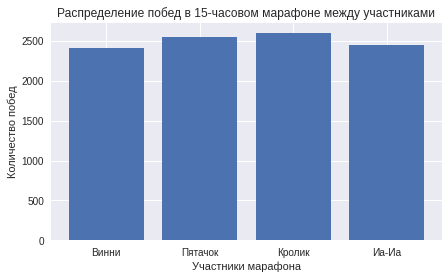

In [0]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(7,4))
ax.bar(['Винни','Пятачок','Кролик','Иа-Иа'], height=(np.sum(pobed==0),np.sum(pobed==1),np.sum(pobed==2),np.sum(pobed==3)))
ax.set_xlabel('Участники марафона')
ax.set_ylabel('Количество побед')
ax.set_title('Распределение побед в {}-часовом марафоне между участниками'.format(n))
plt.show()

Распределение побед между участниками примерно равное, поскольку математические ожидания для всех четырех распределений равны 1, а значит при больших выборках среднее по всем наблюдениям для каждого из участников будет сходиться к мат ожиданию, а количество побед будет равномерно распредлено между ними.  Дисперсии всех трех распределений тоже равны 1, поэтому даже при небольших n распределение побед будет примерно равномерным.


###Задание 2

In [0]:
n=10
vin = np.random.exponential(1,size=(10**4,n)).reshape(n*10**4)
pyat = np.random.normal(1,1,size=(10**4,n)).reshape(n*10**4)
krol = np.random.poisson(1,size=(10**4,n)).reshape(n*10**4)
ia = (np.random.binomial(1,0.5, size=(10**4,n))*2).reshape(n*10**4)
mar = np.array([vin+pyat,krol+ia])
mar = np.reshape(mar, (10**4*2,n))
mar = np.reshape(mar, (10**4,2,n), order='F')
mar.shape

(10000, 2, 10)

In [0]:
pobed = np.reshape(mar,(20000,n))
pobed = np.sum(pobed, axis=1)
pobed = np.reshape(pobed,(10000,2))
pobed = pobed.argmax(axis=1)
print('Количество побед Винни-Пуха и Пятачка',np.sum(pobed==0))
print('Количество побед Кролика и Иа-Иа',np.sum(pobed==1))

Количество побед Винни-Пуха и Пятачка 4973
Количество побед Кролика и Иа-Иа 5027


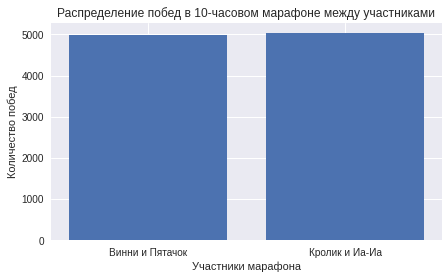

In [0]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(7,4))
ax.bar(['Винни и Пятачок','Кролик и Иа-Иа'], height=(np.sum(pobed==0),np.sum(pobed==1)))
ax.set_xlabel('Участники марафона')
ax.set_ylabel('Количество побед')
ax.set_title('Распределение побед в {}-часовом марафоне между участниками'.format(n))
plt.show()

Поскольку мы просто объединили команды, а для каждого участника среднее сходится к мат ожиданию, а дисперсия суммы - это сумма дисперсий, то и для команд из двух участников количество побед будет примерно равным

## 3. Avito (30 баллов)

В этом задании вам нужно будет написать функцию, которая парсит [Авито](https://www.avito.ru) (будем рассматривать только Москву). Эта функция принимает два параметра:
* search - то, что мы ищем на avito
* page - номер страницы, с которой парсим информацию

```python
def parse_page(search, page):
    # тут ваш код
df = parse_page('гречка', 4)
```
Нужно скачать следующую информацию:
* название объявления
* ссылка на объявление
* цена
* метро (если есть), вам нужно аккуратно обрабатывать None или использовать конструкцию try-except
* сколько метров от метро (если есть)

Эту информацию лучше сохранить в виде pandas df.

В данном задании **не нужно** парсить все страницы (вас могут забанить). Нужно лишь сделать функцию, которая парсит одну страницу. Чтобы вас не забанили сделаейте request один раз и работайте с вашей страничкой без функции. После того как все будет готово, оберните весь ваш код в функцию.

In [0]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np


In [0]:
def parse_page(search, page):
  file = requests.get('https://www.avito.ru/moskva?q=' + str(search) + '&p=' + str(page))
  work = BeautifulSoup(file.content, 'html.parser')
  a = work.find_all('div', class_='item__line')
  data = []
  for i in range(len(a)):
    buy = []
    buy.append(a[i].find('a', class_='snippet-link').text.strip())
    buy.append('avito.ru' + str(a[i].a.get('href')))
    if a[i].find('span', class_='snippet-price').text.strip() == 'Бесплатно':
      buy.append(0)
    elif a[i].find('span', class_='snippet-price').text.strip() == 'Цена не указана' or a[i].find('span', class_='snippet-price').text.strip() == 'Зарплата не указана':
      buy.append(np.nan)
    else:
      try:
        buy.append(int(a[i].find('span', class_='snippet-price').text.replace('₽','').strip().replace(' ', '')))
      except:
        if a[i].find('span', class_='snippet-price').text.replace('₽\n','').strip()[-7:] == 'в месяц':
          buy.append(int(a[i].find('span', class_='snippet-price').text.replace('₽','').strip()[:-7].replace(' ', '')))
        elif a[i].find('span', class_='snippet-price').text.replace('₽\n','').strip()[-8:] == 'за сутки':
          buy.append(int(a[i].find('span', class_='snippet-price').text.replace('₽','').strip()[:-8].replace(' ', '')))
    # на случай, если там не метро, то не будет цветовой метки ветки 
    # просто класс item-address-georeferences-item__content не показательный, так как там часто лежит не метро
    if a[i].find('i', class_="item-address-georeferences-item-icons__icon") != None:
      buy.append(a[i].find('span', class_='item-address-georeferences-item__content').text)
    else:
      buy.append(np.nan)
    if a[i].find('span', class_="item-address-georeferences-item__after") != None:
      way = a[i].find('span', class_="item-address-georeferences-item__after").text.replace('\xa0', '').strip()
      if way[-2:] != 'км':
        buy.append(int(way[:-1]))
      else:
        buy.append(int(float(way[:-2].replace(',', '.'))*1000))
    else:
      buy.append(np.nan)
    data.append(buy)
  df = pd.DataFrame(data, columns= ('Название объявления', 'Cсылка на объявление', 'Цена (₽)', 'Метро', 'Расстояние до метро (в метрах)'))
  return df

In [0]:
parse_page('квартира', 3)

,Название объявления,Cсылка на объявление,Цена (₽),Метро,Расстояние до метро (в метрах)
0,"2-к квартира, 33.1 м², 4/8 эт.",avito.ru/moskva/kvartiry/2-k_kvartira_33.1_m_4...,7200000,Селигерская,500.0
1,"2-к квартира, 60 м², 20/25 эт.",avito.ru/moskva/kvartiry/2-k_kvartira_60_m_202...,9500000,Пятницкое шоссе,1200.0
2,"Студия, 12.1 м², 1/9 эт.",avito.ru/moskva/kvartiry/studiya_12.1_m_19_et....,2490000,Рязанский проспект,500.0
3,"1-к квартира, 42 м², 9/20 эт.",avito.ru/moskva/kvartiry/1-k_kvartira_42_m_920...,1690,Строгино,1000.0
4,"1-к квартира, 34 м², 4/12 эт.",avito.ru/moskva/kvartiry/1-k_kvartira_34_m_412...,28000,NaN,NaN
5,"2-к квартира, 76 м², 11/22 эт.",avito.ru/moskva/kvartiry/2-k_kvartira_76_m_112...,1500,Речной вокзал,600.0
6,"1-к квартира, 38 м², 3/8 эт.",avito.ru/moskva/kvartiry/1-k_kvartira_38_m_38_...,8000000,Солнцево,500.0
7,"Студия, 24.3 м², 1/12 эт.",avito.ru/moskva/kvartiry/studiya_24.3_m_112_et...,4000000,Бибирево,300.0
8,"1-к квартира, 35 м², 2/5 эт.",avito.ru/moskva/kvartiry/1-k_kvartira_35_m_25_...,1400,Петровский парк,900.0
9,"6-к квартира, 251.5 м², 3/3 эт.",avito.ru/moskva/kvartiry/6-k_kvartira_251.5_m_...,45000000,Чкаловская,800.0


In [0]:
parse_page('щенок', 2)

,Название объявления,Cсылка на объявление,Цена (₽),Метро,Расстояние до метро (в метрах)
0,Немецкой овчарки щенки от Чемпиона Евразии,avito.ru/moskva/sobaki/nemetskoy_ovcharki_sche...,25000.0,Нижегородская,100.0
1,Поденко ибиценко щенки ивисская борзая,avito.ru/moskva/sobaki/podenko_ibitsenko_schen...,60000.0,Кунцевская,400.0
2,Дрессированные подрощены щенки малинуа,avito.ru/moskva/sobaki/dressirovannye_podrosch...,NaN,Арбатская,200.0
3,Щенки Бордер Колли,avito.ru/moskva/sobaki/schenki_border_kolli_18...,60000.0,Юго-Западная,NaN
4,Красивые щенки Бигль,avito.ru/moskva/sobaki/krasivye_schenki_bigl_1...,16000.0,Ясенево,900.0
5,Щенок №14 ищем малышке дом,avito.ru/moskva/sobaki/schenok_14_ischem_malys...,0.0,Теплый стан,NaN
6,Корги Пемброк и Кардиганы Щенки,avito.ru/moskva/sobaki/korgi_pembrok_i_kardiga...,NaN,Теплый стан,NaN
7,Щенки чау чау,avito.ru/moskva/sobaki/schenki_chau_chau_19033...,12000.0,Савеловская,600.0
8,Щенок 8 месяцев,avito.ru/moskva/sobaki/schenok_8_mesyatsev_189...,500.0,Щелковская,100.0
9,Шикарный щенок в добрые руки 60см в холке,avito.ru/moskva/sobaki/shikarnyy_schenok_v_dob...,500.0,Щелковская,1200.0


## 4. Walmart (30 баллов)

В файле *walmart.csv* нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.


Вам нужно выполнить следующие задания:
1. Загрузить файл с данными. Отобразить первые и последние 5 наблюдений. Узнать сколько наблюдений и переменных есть в вашем наборе данных. Какой тип(формат) имеет каждая переменная? Привести переменную Date к формату даты.
2. Разобраться с пропущенными значениями:
    * вывести сколько пропущенных значений в процентах есть в каждой переменной;
    * удалить переменные, которые имеют более 60% пропущенных значений.
3. Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные? 
4. Посмотреть динамику продаж в магазинах walmart в целом. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart.
5. Найдите и нарисуйте матрицу корреляции для числовых показателей.
6. Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.
7. Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly_express
import plotly_express as px
!pip install mplcyberpunk
import mplcyberpunk

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
df = pd.read_csv('/content/drive/My Drive/walmart.csv')

In [0]:
df.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [0]:
df.tail()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
418238,45,2012-10-19,98,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [0]:
print('Количество наблюдений:',df.shape[0])
print('Количество переменных:',df.shape[1])

Количество наблюдений: 418239
Количество переменных: 16


In [0]:
df.dtypes

Store             int64
Date             object
Dept              int64
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [0]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
print(df['Date'].dtypes)

datetime64[ns]


In [0]:
df = df.loc[:, df.isnull().sum()/len(df) < 0.6]
df

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,192.327265,8.667


In [0]:
print('Количество магазинов', df['Store'].nunique())
print('Количество отделов', df['Dept'].nunique())
print('Период времени',df['Date'].min(), '-', df['Date'].max())

Количество магазинов 45
Количество отделов 81
Период времени 2010-02-05 00:00:00 - 2012-10-19 00:00:00


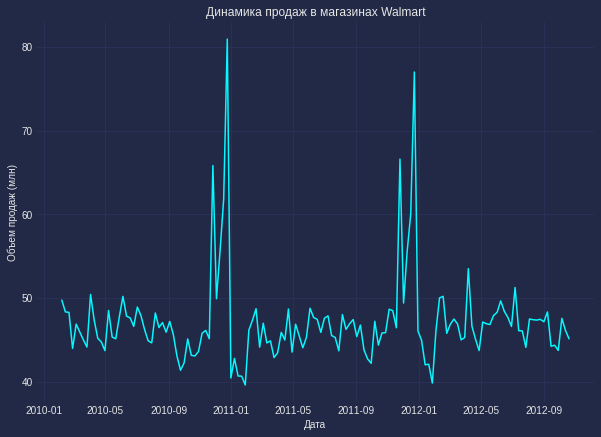

In [0]:
plt.style.use("cyberpunk")
fig, ax = plt.subplots(figsize=(10,7))
df1 = df[['Date','Weekly_Sales']].groupby('Date', as_index=False).sum()
ax.plot(df1['Date'], df1['Weekly_Sales']/1000000)
ax.set_xlabel('Дата')
ax.set_ylabel('Объем продаж (млн)')
ax.set_title('Динамика продаж в магазинах Walmart')
plt.show()

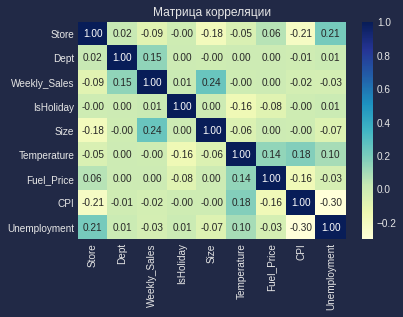

In [0]:
#матрица корреляции
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='YlGnBu').set_title('Матрица корреляции')
plt.show()

In [0]:
# Найдем 5 лучший магазинов по продажам
best = df.groupby('Store', as_index=False).sum().nlargest(5, 'Weekly_Sales')
# Сгруппируем про дажи по датам в каждом магазине
time = df.groupby(['Date','Store'], as_index=False).sum()
#Объединим и построим динамику
dynamics = time.merge(best, on='Store')
dynamics = dynamics[['Date','Weekly_Sales_x', 'Store']]
dynamics.rename(columns={'Weekly_Sales_x':'Weekly Sales'}, inplace=True)
px.line(dynamics, x='Date', y ='Weekly Sales', color='Store', title='Динамика продаж топ-5 магазинов за все время')

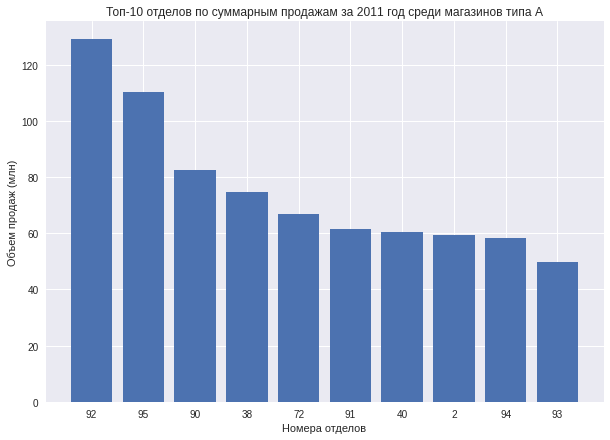

In [0]:
#Отберем данные только за 2011 год
y2011 = df[df.apply(lambda x: (x['Date'].year), axis=1)==2011] #and df['Type']=='A']
#Найдем топ-10 отделов по суммарным продажам за 2011 год среди магазинов типа А
top10 = y2011[y2011['Type']=='A'].groupby('Dept', as_index=False).sum().nlargest(10,'Weekly_Sales').astype({'Dept': 'str'})
#Нарисуем столбчатую диаграмму
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(top10['Dept'],height=top10['Weekly_Sales']/1000000)
ax.set_title('Топ-10 отделов по суммарным продажам за 2011 год среди магазинов типа А')
ax.set_xlabel('Номера отделов')
ax.set_ylabel('Объем продаж (млн)')
plt.show()

## 5. Парадокс дней рождений (30 баллов)

Прочитайте на википедии про [парадокс дней рождений](https://ru.wikipedia.org/wiki/Парадокс_дней_рождения). В этой задаче нам предстоит его проверить. Итак, в произвольной группе из  $50$ человек вероятность того, что хотя бы у двоих людей дни рождения совпадут, равна  $0.97$. Но это всё только в теории. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так. В связи с этим реальная вероятность может отличаться от теоретической.

В этой задачке вам предстоит проверить парадокс дней рождений на эмпирических данных. От вас требуется:
1. Выбрать какое-то большое сообщество в Vk. С помощью VkAPI выкачать инфорацию по ее подписчикам (самое главное это дата рождения, а также id пользователя, который будет его характеризовать. Не оставляйте свой токен 
2. Удалите из данных всех, кто не указал когда он родился. Приведите колонку с датами рождений к удобному, однообразному виду.
3. Постройте гистограмму, на которой было бы понятно, в какой месяц родилось какое количество людей. Правда ли, что рождаемость людей в течение года распределена равномерно?
4. Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения. Для этого напишите цикл, в ходе которого из таблички будет делаться подвыборка из 50 строк. Для этих 50 строк внутри условия вы должны проверить совпадение дней рождений. Если совпало, то нужно запомнить это в переменную счётчик, которую вы впоследствии, чтобы получить вероятность, поделите на длину цикла.

**Обратите внимание, что часто придётся прогонять один и тот же код. Не надо его копировать. Оформите его в виде функции.** 

###Загрузим нужные нам данные из VK

In [0]:
import requests
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
#lentach
def lentach(offset):
  page = requests.get('https://api.vk.com/method/groups.getMembers?group_id=29534144&offset={}&fields=bdate&access_token=....&v=5.103'.format(offset))
  a = page.json()['response']['items']
  birthdays = []
  for i in a:
    try:
      bday = i['bdate']
      birthdays.append([bday, i['id']])
    except:
      birthdays.append([np.nan, i['id']])
  return birthdays 

In [0]:
#ВК ставит ограничение на скачивание информации о 1000 пользователях за раз
#обойдем это с помощью цикла
all = []
for i in tqdm(range(0,2275000,1000)):
  a = lentach(i)
  for i in a:
    all.append(i)

100%|██████████| 2275/2275 [29:16<00:00,  1.30it/s]


In [0]:
df = pd.DataFrame(all, columns = ('Дата рождения', 'ID'))

In [0]:
df = df.dropna().reset_index(drop=True)
df

,Дата рождения,ID
0,23.4,177
1,19.4,212
2,19.6,266
3,14.11.1985,431
4,24.12.1988,495
...,...,...
1484921,3.6.1995,587928946
1484922,19.3.2001,587930020
1484923,18.3.2002,587931149
1484924,1.6.1928,587931523


Уберем года, они нам не нужны

In [0]:
df['Дата рождения'] = [i if len(i)<=5 else i[:-5] for i in df['Дата рождения']]

Люди как-то смогли поставить 29 и 31 февраля, нужно это убрать

In [0]:
df['Дата рождения'] = [np.nan if i=='29.2' or i =='31.2' else i  for i in df['Дата рождения']]
df = df.dropna().reset_index(drop=True)

In [0]:
df

,Дата рождения,ID
0,23.4,177
1,19.4,212
2,19.6,266
3,14.11,431
4,24.12,495
...,...,...
1482847,3.6,587928946
1482848,19.3,587930020
1482849,18.3,587931149
1482850,1.6,587931523


In [0]:
from google.colab import files
df.to_csv('birthdays.csv')
files.download('birthdays.csv')

###Теперь можем работать уже с готовыми данными из файла bithdays.csv

In [0]:
df = pd.read_csv('/content/drive/My Drive/birthdays.csv')
df.drop('Unnamed: 0', axis=1)

In [0]:
df['Количество']=[1]*len(df)
df['Дата рождения'] = list(map(str, df['Дата рождения']))
df1 = df.groupby(by=df.apply(lambda x: (int(x['Дата рождения'].split('.')[1])), axis=1)).sum().drop('ID', axis=1)

In [0]:
df1

,Количество
1,133342
2,117605
3,127141
4,127396
5,128998
6,129555
7,131664
8,126055
9,116513
10,116443


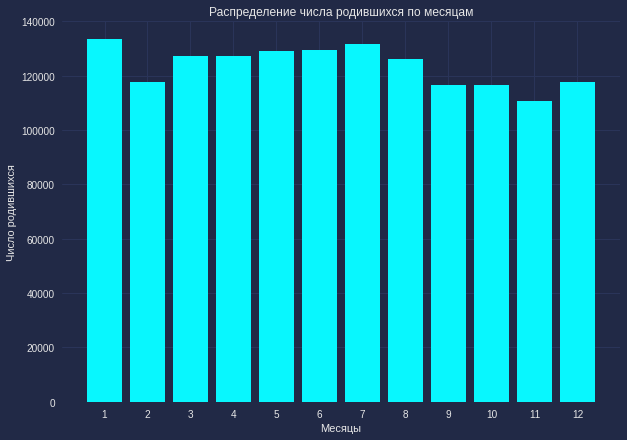

In [0]:
plt.style.use('cyberpunk')
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(df1.index, height=df1['Количество'])
ax.set_xticks(df1.index)
ax.set_ylabel('Число родившихся')
ax.set_xlabel('Месяцы')
ax.set_title('Распределение числа родившихся по месяцам')
plt.show()

Мы действительно получили приблизительно равномерное распределение. Однако, мы получили не совсем справедливую выборку, поскольку в дефолтных настройках вк при регистрации даты стоит 01.01(многим лень менять на реальную дату, поэтому оставляют либо 01.01, либо немножко меняют день), что сильно влияет на высоту первого столбика. Также очень популярны красивые даты 05.05, 06.06 и тд., которые люди ставят просто так, что сдвигает нашу выборку, но несущественно.(самые популярные даты рождения см. ниже)

In [0]:
df.groupby('Дата рождения').sum().drop('ID', axis=1).sort_values('Количество',ascending=False).head(10)

,Количество
Дата рождения,
1.1,13447
1.2,6597
1.4,6448
7.7,5725
6.6,5643
5.5,5333
1.3,5275
1.6,5097
3.3,4952


In [0]:
#Выбор без возвращения можно делать тремя разными способами,которые существенно не отличаются по скорости
#поэтому оставим самый простой код через df.sample
cnt=0
number = 10000
for i in tqdm(range(number)):
  #a = np.random.choice(len(df), 50, replace=False)
  #a = np.random.permutation(np.arange(len(df)))[:50]
  #if df.loc[a, 'Дата рождения'].nunique()< 50:
  if df['Дата рождения'].sample(50,replace=False).nunique() < 50:
    cnt +=1
print('Вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения:' ,cnt/number)

100%|██████████| 10000/10000 [06:34<00:00, 25.33it/s]

Вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения: 0.9752
